In [2]:
import pandas as pd
import numpy as np

#### load data.

In [3]:
df = pd.read_csv('../data/processed/dataset.csv')

#### check data

In [4]:
df.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'age',
       'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_rank',
       'team_position', 'nationality', 'preferred_foot', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_c

In [5]:
df.shape

(4903, 60)

In [6]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


In [7]:
df.head(3)

,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,league_rank,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
0,L. Messi,RW,93,93,33,170,72,FC Barcelona,Spain Primera Division,1.0,...,96,35,24,6,11,15,14,8,560000,67500000
1,Cristiano Ronaldo,ST,92,92,35,187,83,Juventus,Italian Serie A,1.0,...,95,32,24,7,11,15,14,11,220000,46000000
2,J. Oblak,GK,91,93,27,188,87,Atlético Madrid,Spain Primera Division,1.0,...,68,12,18,87,92,78,90,90,125000,75000000


In [8]:
df.tail(3)

,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,league_rank,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
4900,R. Shawcross,CB,70,70,32,191,76,Stoke City,English League Championship,2.0,...,64,68,72,10,12,7,13,15,15000,1100000
4901,J. Moulin,GK,70,70,34,185,88,AS Saint-Étienne,French Ligue 1,1.0,...,59,13,14,72,70,65,68,71,12000,775000
4902,L. Tomlin,CAM,70,70,31,180,74,Cardiff City,English League Championship,2.0,...,68,36,33,9,12,13,12,11,16000,1600000


#### analyze columns

In [9]:
# Tạo DataFrame chứa kiểu dữ liệu của các cột trong DataFrame data
df_type = pd.DataFrame(data = df.dtypes)
# Lấy các giá trị duy nhất của kiểu dữ liệu
unique_types = df_type[0].unique()
# In ra các kiểu dữ liệu duy nhất
print(unique_types)

[dtype('O') dtype('int64') dtype('float64')]


In [10]:
list(df.select_dtypes(include=['Int64','float64']))

['overall',
 'potential',
 'age',
 'height_cm',
 'weight_kg',
 'league_rank',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'g

In [11]:
list(df.select_dtypes(include=['O']))

['short_name',
 'player_positions',
 'club_name',
 'league_name',
 'team_position',
 'nationality',
 'preferred_foot']

           overall    potential          age    height_cm    weight_kg  \
count  4903.000000  4903.000000  4903.000000  4903.000000  4903.000000   
mean     74.381399    76.922904    27.237814   181.460126    76.164797   
std       3.727531     4.592778     4.115298     6.920926     7.243208   
min      70.000000    70.000000    17.000000   157.000000    55.000000   
25%      72.000000    73.000000    24.000000   176.000000    71.000000   
50%      73.000000    76.000000    27.000000   182.000000    76.000000   
75%      76.000000    80.000000    30.000000   187.000000    81.000000   
max      93.000000    95.000000    42.000000   203.000000   104.000000   

       league_rank         pace     shooting      passing    dribbling  ...  \
count  4903.000000  4903.000000  4903.000000  4903.000000  4903.000000  ...   
mean      1.115236    69.448461    59.912407    65.265241    69.572044  ...   
std       0.325037    11.826572    13.176989     8.482006     8.582939  ...   
min       1.00000

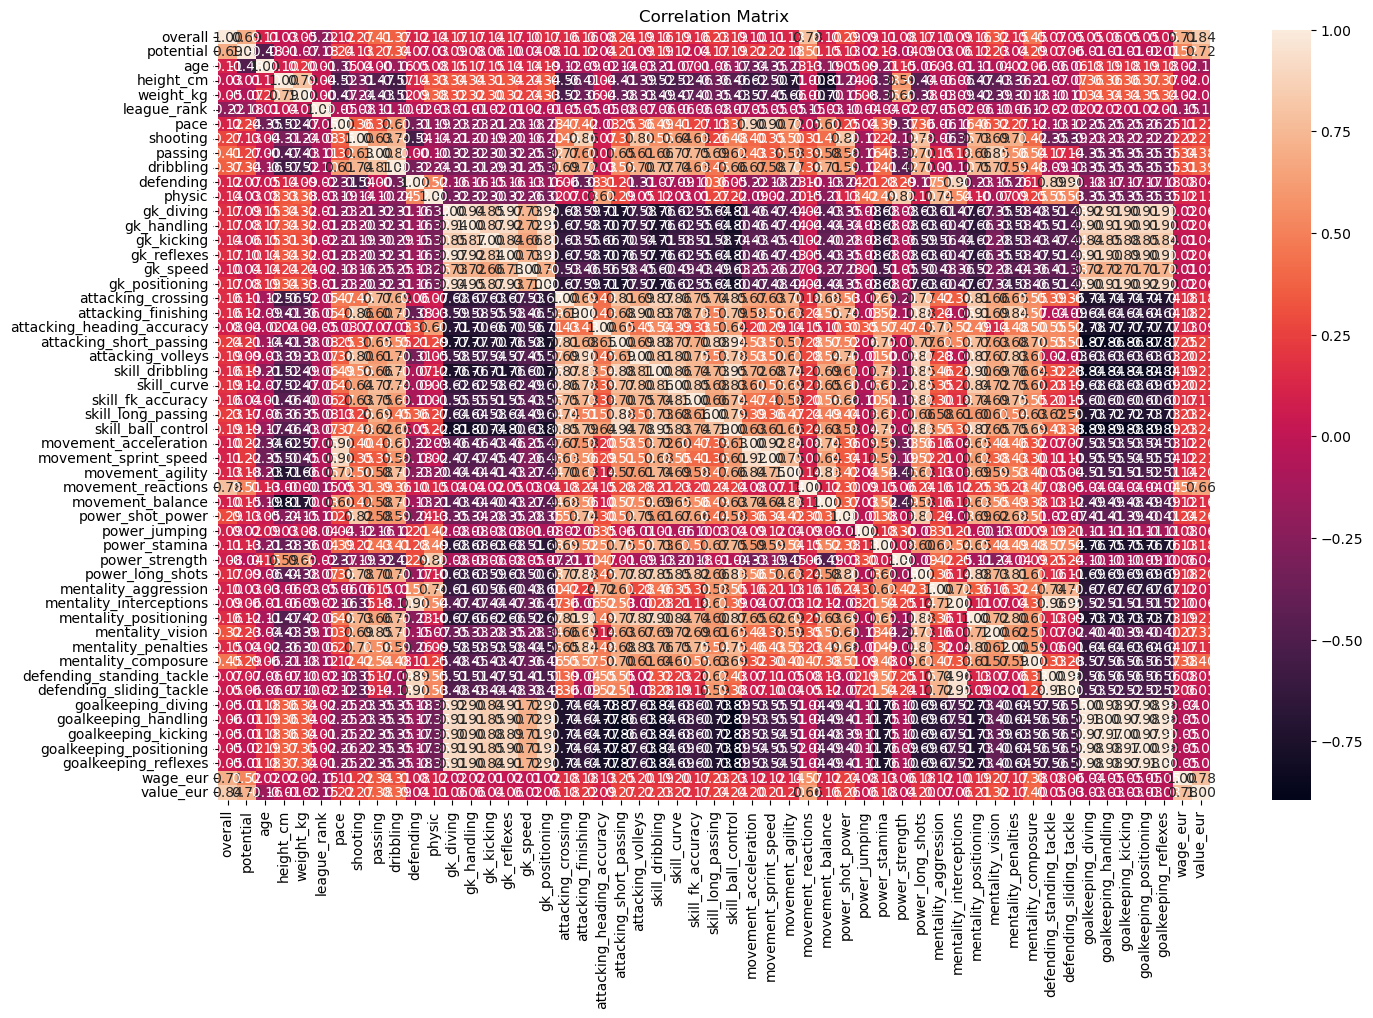

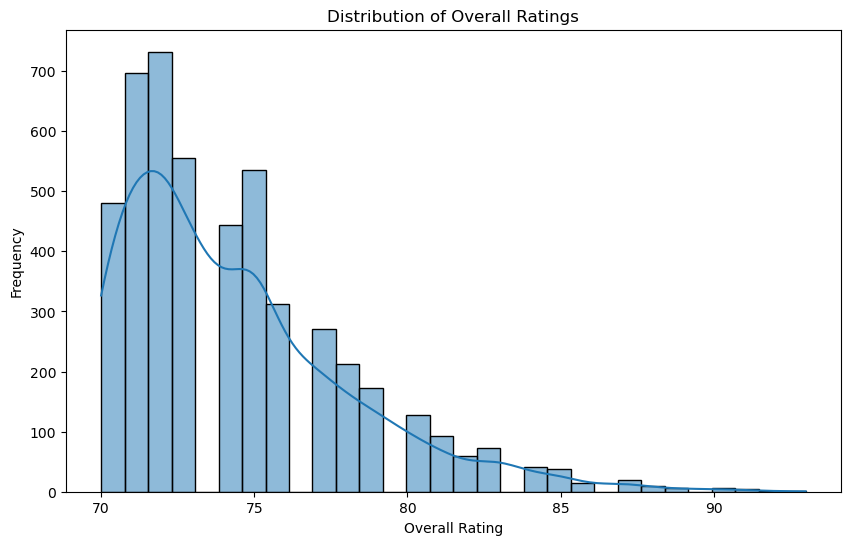

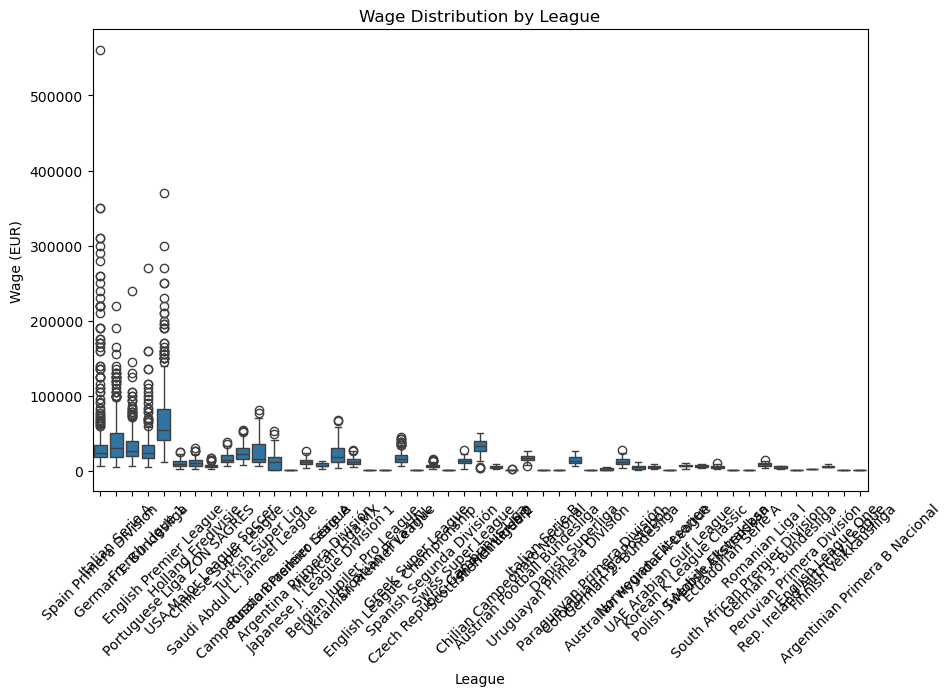

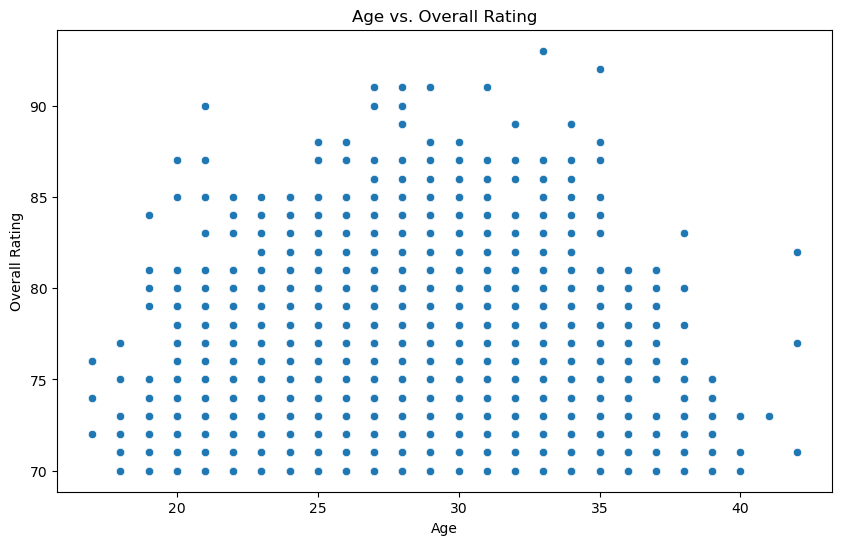

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your cleaned DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]

# Descriptive Statistics
print(numeric_df.describe())

# Correlation Matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Distribution of Overall Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['overall'], bins=30, kde=True)
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()

# Box Plot for Wages
plt.figure(figsize=(10, 6))
sns.boxplot(x='league_name', y='wage_eur', data=df)
plt.title("Wage Distribution by League")
plt.xlabel("League")
plt.ylabel("Wage (EUR)")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot for Age vs. Overall Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='overall', data=df)
plt.title("Age vs. Overall Rating")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()


/tmp/ipykernel_5969/641696724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overall', y='short_name', data=top_overall_players, palette='viridis')


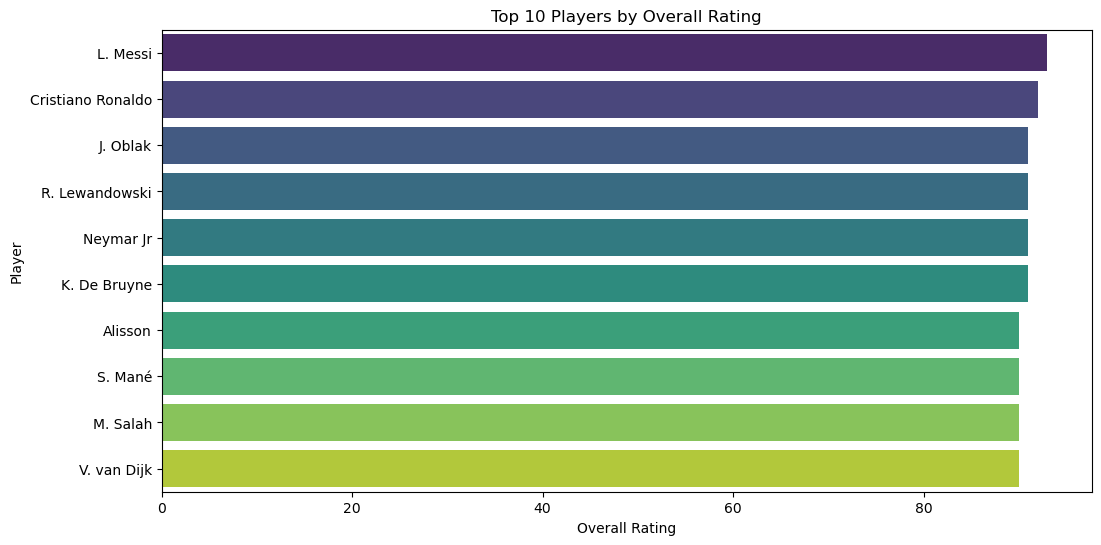

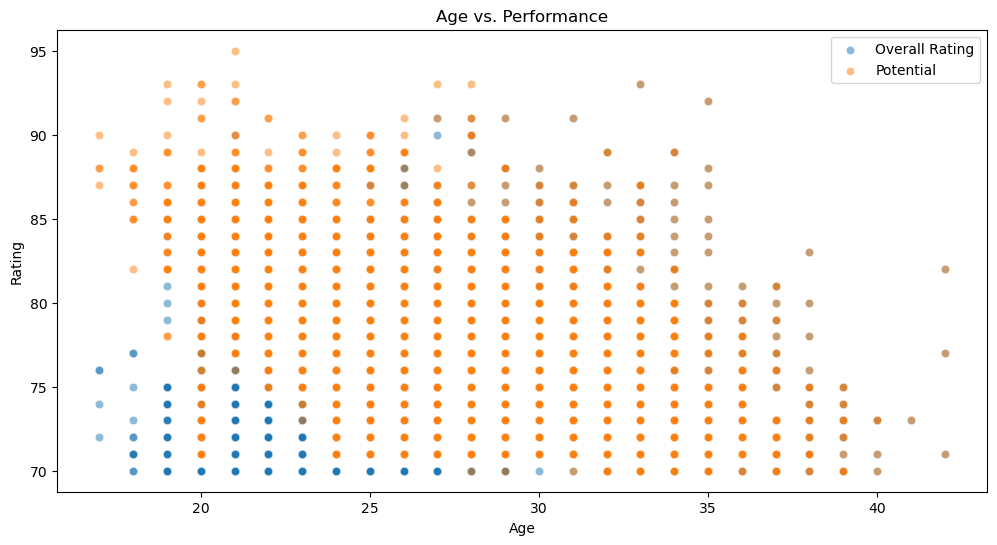

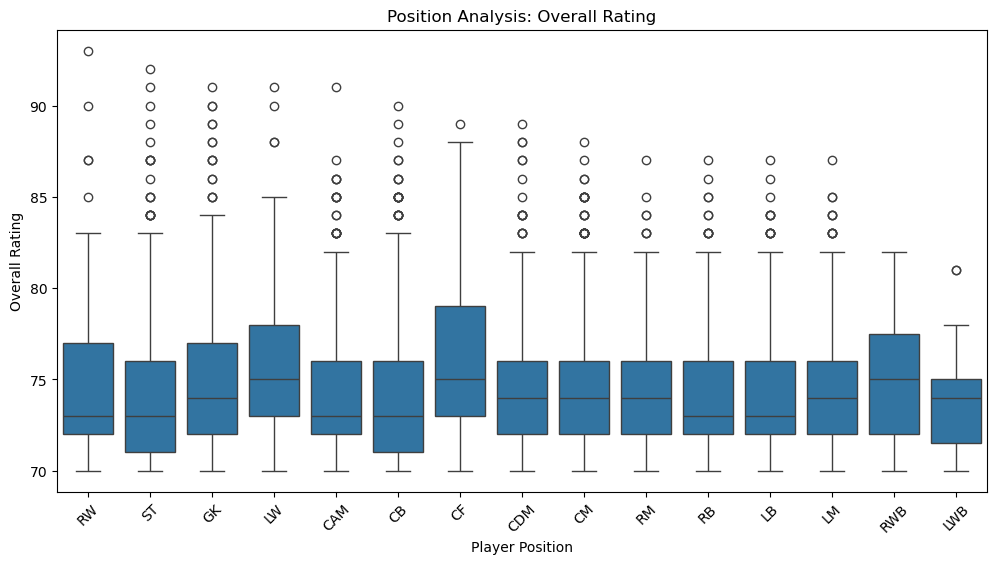

/tmp/ipykernel_5969/641696724.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wage_eur', y='short_name', data=top_earners, palette='magma')


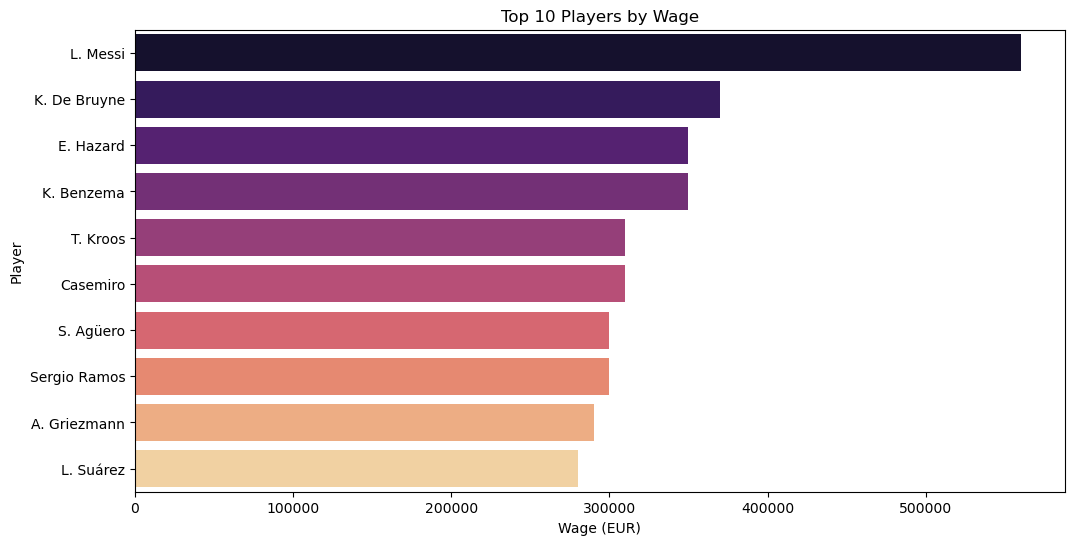

/tmp/ipykernel_5969/641696724.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value_eur', y='short_name', data=most_valuable, palette='plasma')


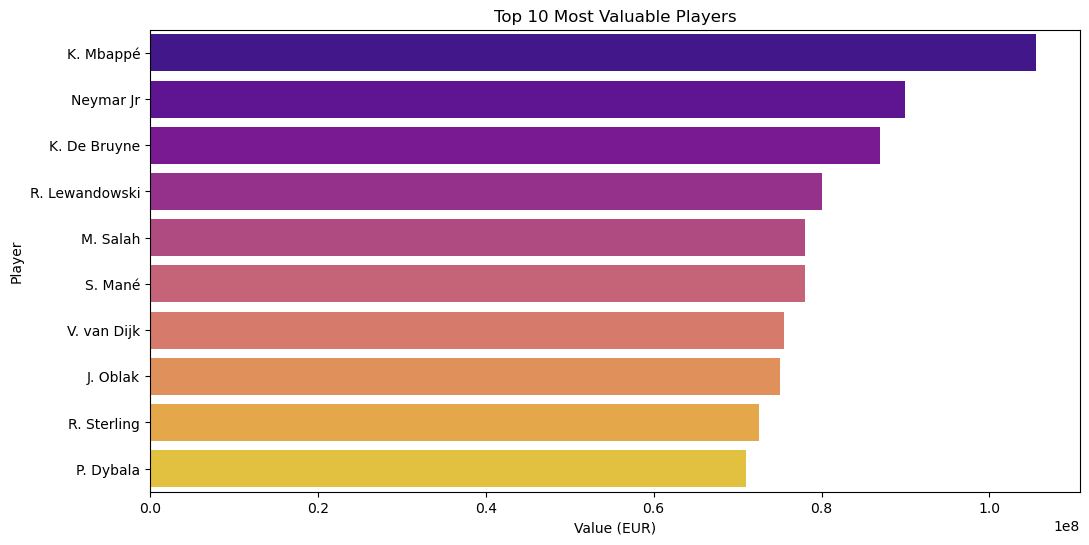

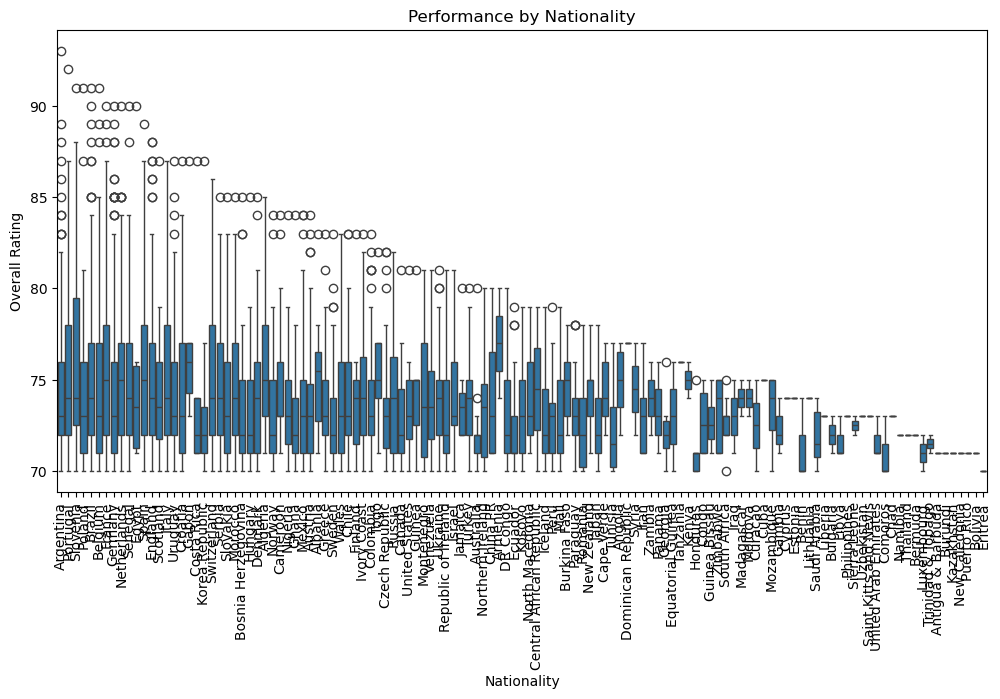

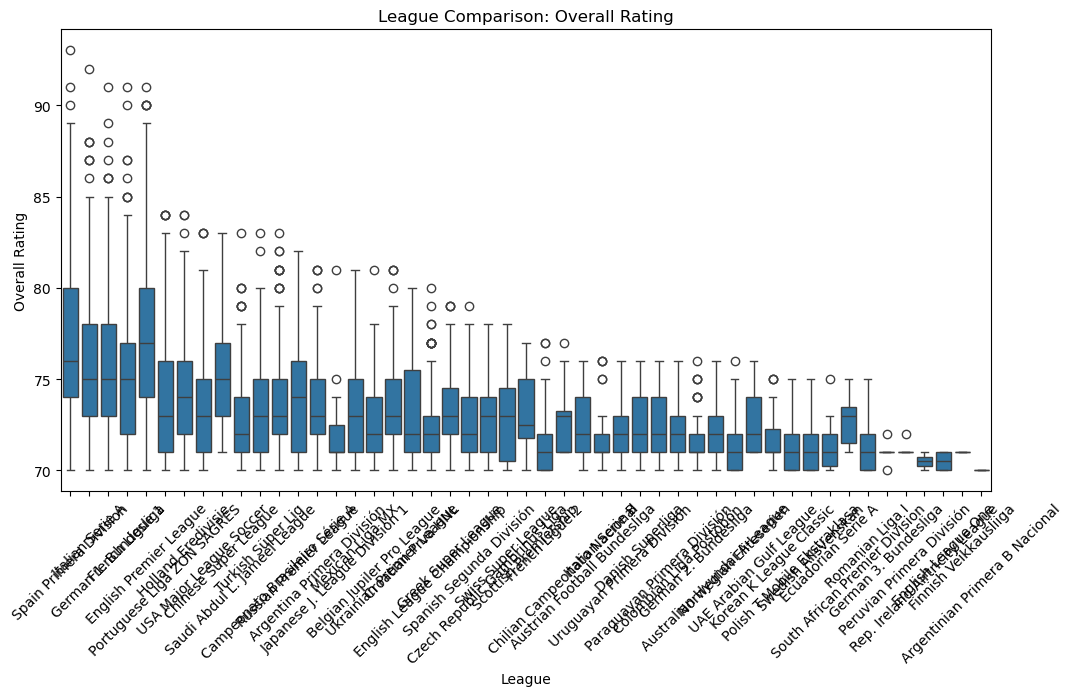

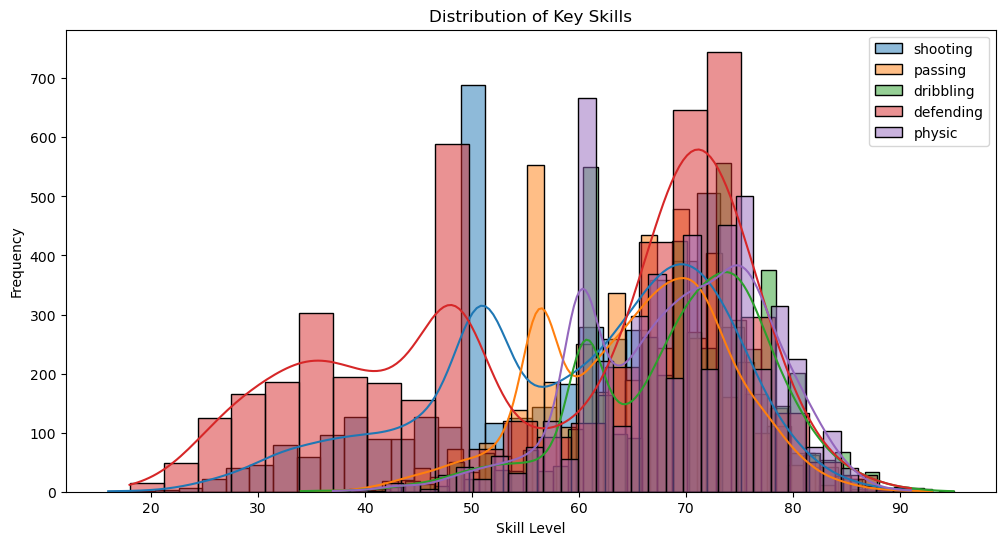

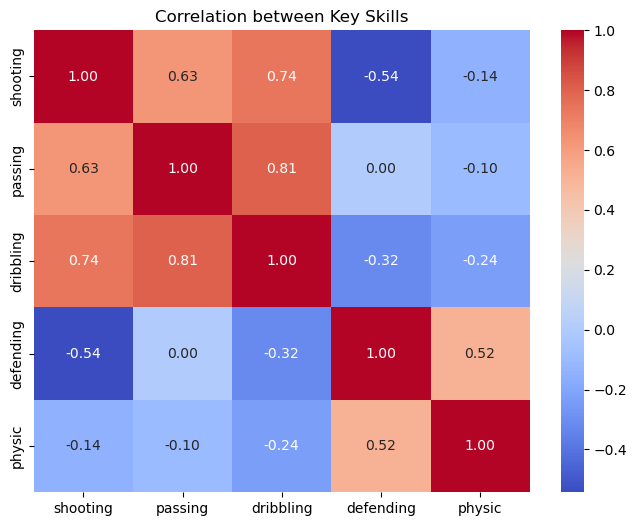

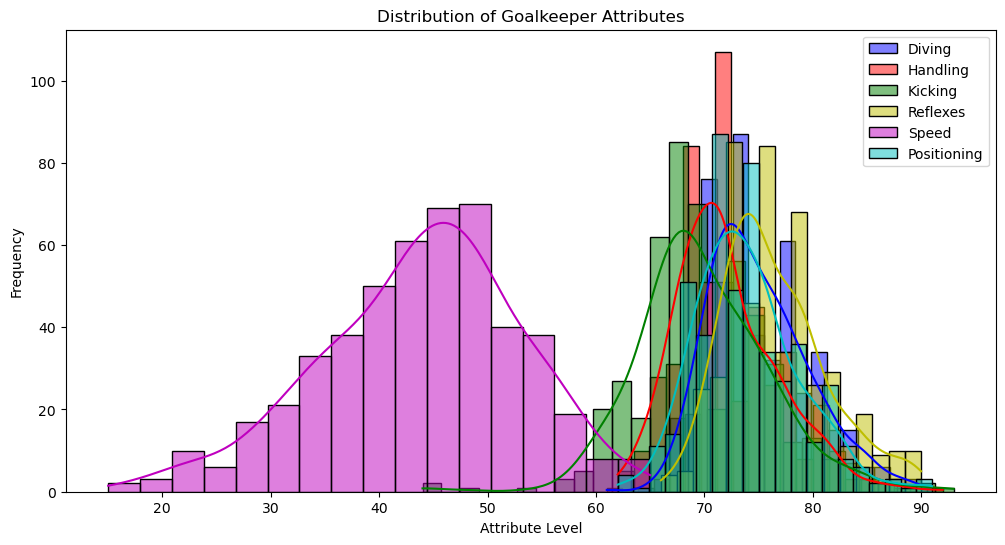

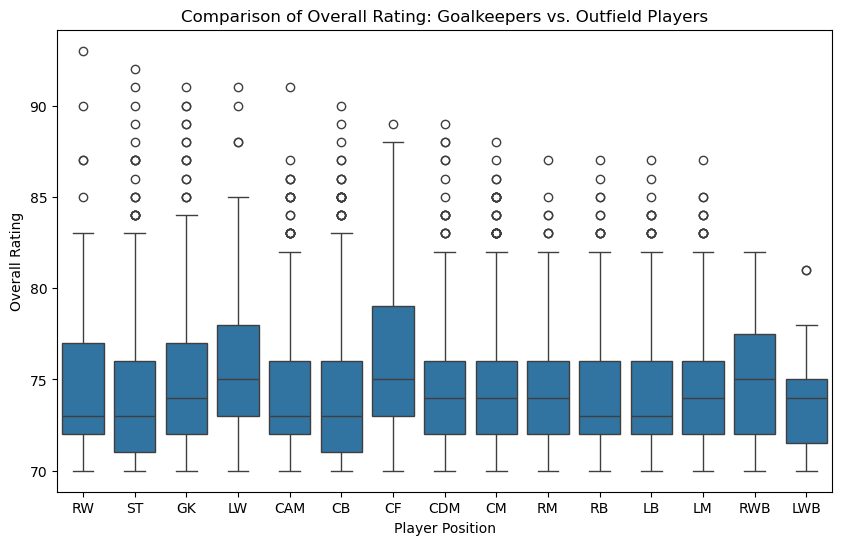

In [13]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Comparative Analysis

# Top Players based on Overall Rating
top_overall_players = df.sort_values(by='overall', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='overall', y='short_name', data=top_overall_players, palette='viridis')
plt.title('Top 10 Players by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Player')
plt.show()

# Age vs. Performance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='overall', data=df, alpha=0.5)
sns.scatterplot(x='age', y='potential', data=df, alpha=0.5)
plt.legend(['Overall Rating', 'Potential'])
plt.title('Age vs. Performance')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.show()

# Position Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='player_positions', y='overall', data=df)
plt.title('Position Analysis: Overall Rating')
plt.xlabel('Player Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.show()

# Value and Wage Analysis

# Top Earners
top_earners = df.sort_values(by='wage_eur', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='wage_eur', y='short_name', data=top_earners, palette='magma')
plt.title('Top 10 Players by Wage')
plt.xlabel('Wage (EUR)')
plt.ylabel('Player')
plt.show()

# Most Valuable Players
most_valuable = df.sort_values(by='value_eur', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='value_eur', y='short_name', data=most_valuable, palette='plasma')
plt.title('Top 10 Most Valuable Players')
plt.xlabel('Value (EUR)')
plt.ylabel('Player')
plt.show()

# Nationality and League Analysis

# Performance by Nationality
plt.figure(figsize=(12, 6))
sns.boxplot(x='nationality', y='overall', data=df)
plt.title('Performance by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)
plt.show()

# League Comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='league_name', y='overall', data=df)
plt.title('League Comparison: Overall Rating')
plt.xlabel('League')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.show()

# Skill Analysis

# Distribution of Key Skills
skills = ['shooting', 'passing', 'dribbling', 'defending', 'physic']
plt.figure(figsize=(12, 6))
for skill in skills:
    sns.histplot(df[skill], kde=True, alpha=0.5, label=skill)
plt.title('Distribution of Key Skills')
plt.xlabel('Skill Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Skill Correlation
skill_corr = df[skills].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(skill_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Key Skills')
plt.show()

# Goalkeeper Analysis

# Goalkeeper Attributes
goalkeepers = df[df['player_positions'] == 'GK']
plt.figure(figsize=(12, 6))
sns.histplot(goalkeepers['gk_diving'], kde=True, color='b', alpha=0.5, label='Diving')
sns.histplot(goalkeepers['gk_handling'], kde=True, color='r', alpha=0.5, label='Handling')
sns.histplot(goalkeepers['gk_kicking'], kde=True, color='g', alpha=0.5, label='Kicking')
sns.histplot(goalkeepers['gk_reflexes'], kde=True, color='y', alpha=0.5, label='Reflexes')
sns.histplot(goalkeepers['gk_speed'], kde=True, color='m', alpha=0.5, label='Speed')
sns.histplot(goalkeepers['gk_positioning'], kde=True, color='c', alpha=0.5, label='Positioning')
plt.title('Distribution of Goalkeeper Attributes')
plt.xlabel('Attribute Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Goalkeeper vs. Outfield Players
plt.figure(figsize=(10, 6))
sns.boxplot(x='player_positions', y='overall', data=df)
plt.title('Comparison of Overall Rating: Goalkeepers vs. Outfield Players')
plt.xlabel('Player Position')
plt.ylabel('Overall Rating')
plt.show()
